In [1]:
#Importing packages and tools
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [2]:
#Making a data frame
microbes = pd.read_csv(r"C:\Users\alexa\OneDrive\Documents\DATA 511 Data(1)\microbes.csv")

In [3]:
#Looking at the top five rows of data. There are 24 variables one index column and one class column
microbes.head()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [4]:
microbes.dtypes

Unnamed: 0           int64
Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
dtype: object

In [5]:
#The index column serves no purpose here so i'll drop it from the frame
microbes = microbes.drop(columns = "Unnamed: 0")

array([[<AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>,
        <AxesSubplot:title={'center':'Extrema'}>,
        <AxesSubplot:title={'center':'FilledArea'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Orientation'}>,
        <AxesSubplot:title={'center':'EulerNumber'}>,
        <AxesSubplot:title={'center':'BoundingBox1'}>,
        <AxesSubplot:title={'center':'BoundingBox2'}>],
       [<AxesSubplot:title={'center':'BoundingBox3'}>,
        <AxesSubplot:title={'center':'BoundingBox4'}>,
        <AxesSubplot:title={'center':'ConvexHull1'}>,
        <AxesSubplot:title={'center':'ConvexHull2'}>,
        <AxesSubplot:title={'center':'ConvexHull3'}>],
       [<AxesSubplot:title={'center':'ConvexHull4'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>,
        <AxesSubplot:ti

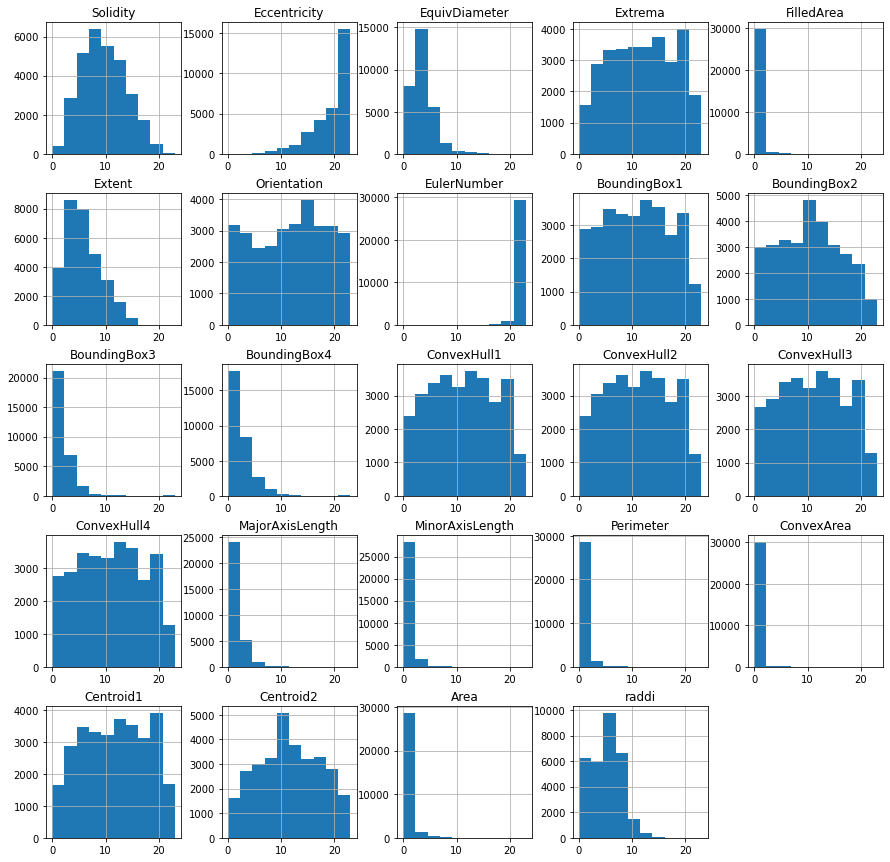

In [6]:
#Ploting a histogram of all the predictors
microbes.hist(figsize = (15,15))

In [7]:
#Labeling encoding the target classes
le = LabelEncoder()
microbes['microbe_class'] = le.fit_transform(microbes['microorganisms'])

In [8]:
microbes.microbe_class.unique()

array([6, 8, 3, 9, 5, 2, 0, 4, 1, 7])

In [9]:
microbes.dtypes

Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
microbe_class        int32
dtype: object

In [10]:
y = microbes["microbe_class"]
X = microbes.drop(["microbe_class","microorganisms"], axis = 1)

In [11]:
#checking to see if i split the the predictors from the target properly
X

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,...,2.97,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99
1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,...,5.49,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99
2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,...,5.99,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99
3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,10.70,...,8.90,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99
4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,1.22,...,10.20,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,9.92,...,20.10,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15
30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,16.20,...,19.20,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15
30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,11.40,...,20.10,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15
30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,20.20,...,20.20,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15


In [12]:
y

0        6
1        6
2        6
3        6
4        6
        ..
30522    7
30523    7
30524    7
30525    7
30526    7
Name: microbe_class, Length: 30527, dtype: int32

In [13]:
#Scaling the data for use in the network
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
X

array([[0.46521739, 0.68695652, 0.23608696, ..., 0.52608696, 0.05695652,
        0.3473913 ],
       [0.24347826, 0.79565217, 0.18      , ..., 0.89565217, 0.03326087,
        0.3473913 ],
       [0.36173913, 0.86086957, 0.20130435, ..., 0.5       , 0.04143478,
        0.3473913 ],
       ...,
       [0.40043478, 0.98695652, 0.09      , ..., 0.50434783, 0.0086087 ,
        0.31086957],
       [0.35695652, 0.9826087 , 0.08130435, ..., 0.88695652, 0.00704348,
        0.31086957],
       [0.28565217, 0.91304348, 0.0926087 , ..., 0.8       , 0.00904348,
        0.31086957]])

In [15]:
#Dividing the data into traning and test data
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [16]:

train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

In [17]:
#Building the structure of the model
model = keras.Sequential([
    layers.Dense(32, activation = 'swish', input_shape = [24]),
    layers.Dropout(.3),
    layers.Dense(32, activation = 'swish'),
    layers.Dropout(.3),
    layers.Dense(32, activation = 'swish'),
    layers.Dropout(.3),
    layers.Dense(10, activation = 'softmax'),
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                800       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3

In [19]:
#Adding methods for optimizing and evaluating the model
model.compile(
  loss = 'categorical_crossentropy',
  optimizer = "adam",
  metrics = ('accuracy')
)

Epoch 1/200
43/43 [==============================] - 0s 6ms/step - loss: 2.2376 - accuracy: 0.1641 - val_loss: 2.1216 - val_accuracy: 0.2478
Epoch 2/200
43/43 [==============================] - 0s 2ms/step - loss: 2.1380 - accuracy: 0.2280 - val_loss: 2.0875 - val_accuracy: 0.2478
Epoch 3/200
43/43 [==============================] - 0s 2ms/step - loss: 2.1031 - accuracy: 0.2409 - val_loss: 2.0491 - val_accuracy: 0.2493
Epoch 4/200
43/43 [==============================] - 0s 2ms/step - loss: 2.0473 - accuracy: 0.2590 - val_loss: 1.9635 - val_accuracy: 0.3025
Epoch 5/200
43/43 [==============================] - 0s 2ms/step - loss: 1.9821 - accuracy: 0.2873 - val_loss: 1.9045 - val_accuracy: 0.3308
Epoch 6/200
43/43 [==============================] - 0s 2ms/step - loss: 1.9321 - accuracy: 0.3094 - val_loss: 1.8622 - val_accuracy: 0.3395
Epoch 7/200
43/43 [==============================] - 0s 2ms/step - loss: 1.8937 - accuracy: 0.3170 - val_loss: 1.8279 - val_accuracy: 0.3362
Epoch 8/200
4

Epoch 59/200
43/43 [==============================] - 0s 2ms/step - loss: 1.5556 - accuracy: 0.4397 - val_loss: 1.4461 - val_accuracy: 0.4989
Epoch 60/200
43/43 [==============================] - 0s 2ms/step - loss: 1.5480 - accuracy: 0.4398 - val_loss: 1.4410 - val_accuracy: 0.4936
Epoch 61/200
43/43 [==============================] - 0s 2ms/step - loss: 1.5516 - accuracy: 0.4407 - val_loss: 1.4376 - val_accuracy: 0.4956
Epoch 62/200
43/43 [==============================] - 0s 2ms/step - loss: 1.5437 - accuracy: 0.4439 - val_loss: 1.4354 - val_accuracy: 0.4944
Epoch 63/200
43/43 [==============================] - 0s 2ms/step - loss: 1.5474 - accuracy: 0.4406 - val_loss: 1.4365 - val_accuracy: 0.5005
Epoch 64/200
43/43 [==============================] - 0s 2ms/step - loss: 1.5435 - accuracy: 0.4430 - val_loss: 1.4326 - val_accuracy: 0.4941
Epoch 65/200
43/43 [==============================] - 0s 2ms/step - loss: 1.5422 - accuracy: 0.4461 - val_loss: 1.4299 - val_accuracy: 0.5028
Epoch 

43/43 [==============================] - 0s 2ms/step - loss: 1.4786 - accuracy: 0.4703 - val_loss: 1.3490 - val_accuracy: 0.5319
Epoch 117/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4770 - accuracy: 0.4676 - val_loss: 1.3484 - val_accuracy: 0.5249
Epoch 118/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4818 - accuracy: 0.4686 - val_loss: 1.3491 - val_accuracy: 0.5300
Epoch 119/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4684 - accuracy: 0.4727 - val_loss: 1.3456 - val_accuracy: 0.5287
Epoch 120/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4765 - accuracy: 0.4698 - val_loss: 1.3463 - val_accuracy: 0.5249
Epoch 121/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4740 - accuracy: 0.4700 - val_loss: 1.3433 - val_accuracy: 0.5308
Epoch 122/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4704 - accuracy: 0.4684 - val_loss: 1.3402 - val_accuracy: 0.5275
Epoch 123/200

43/43 [==============================] - 0s 2ms/step - loss: 1.4382 - accuracy: 0.4846 - val_loss: 1.3013 - val_accuracy: 0.5441
Epoch 174/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4412 - accuracy: 0.4831 - val_loss: 1.3042 - val_accuracy: 0.5421
Epoch 175/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4461 - accuracy: 0.4800 - val_loss: 1.3064 - val_accuracy: 0.5436
Epoch 176/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4455 - accuracy: 0.4812 - val_loss: 1.3013 - val_accuracy: 0.5411
Epoch 177/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4409 - accuracy: 0.4838 - val_loss: 1.3016 - val_accuracy: 0.5414
Epoch 178/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4406 - accuracy: 0.4816 - val_loss: 1.2970 - val_accuracy: 0.5450
Epoch 179/200
43/43 [==============================] - 0s 2ms/step - loss: 1.4451 - accuracy: 0.4845 - val_loss: 1.2990 - val_accuracy: 0.5418
Epoch 180/200

<AxesSubplot:title={'center':'Accuracy'}>

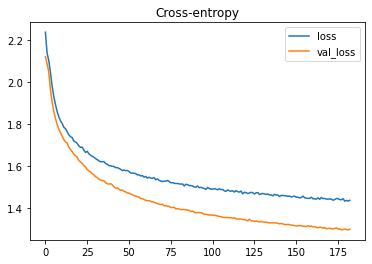

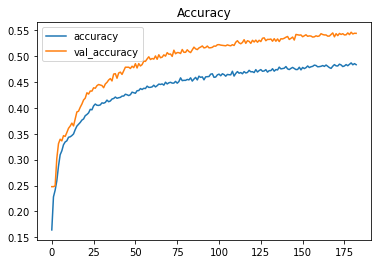

In [20]:
#Adding a callback that will stop the model at best values.
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
#Training the model
history = model.fit(
    train_X, train_y,
    validation_data=(test_X, test_y),
    batch_size=576,
    epochs=200,
    callbacks=[early_stopping],
)
#Plotting the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")